In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
os.getcwd()
data = pd.read_csv("./FullIJCNN2013/gt.txt", sep = ";", header = None)
data.head(10)

,0,1,2,3,4,5
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39
5,00003.ppm,742,443,765,466,4
6,00003.ppm,742,466,764,489,9
7,00003.ppm,737,412,769,443,21
8,00004.ppm,898,342,967,409,21
9,00004.ppm,906,407,955,459,2


In [3]:
data.columns = ["image", "x1", "y1","x2", "y2", "id"]
print("Images with Traffic Signs :", len(data["image"].unique()))
print("Total traffic sign instances in the dataset", len(data["id"]))
print("Total classes in the dataset", len(data["id"].unique()))

Images with Traffic Signs : 741
Total traffic sign instances in the dataset 1213
Total classes in the dataset 43


### Class Distribution

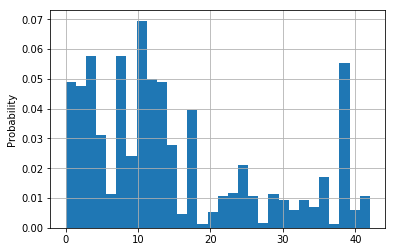

In [10]:
plt.hist(data["id"], density=True ,bins=30)
plt.ylabel("Probability")
plt.grid()

### Train, Test, Validation split

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

def shuffle(data, test_size=0.3, thres=1):
    y_less = data.groupby("id").filter(lambda x: len(x) <= thres)
    data = pd.concat([data, y_less], ignore_index=True)
    sss = StratifiedShuffleSplit(data['id'], 1, test_size=test_size)
    train_index, test_index =list(*sss)
    xtrain, xtest = data.iloc[train_index], data.iloc[test_index]
    
    return xtrain, xtest



c:\users\sravuri\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
xtrain,x_test = shuffle(data,0.3,1) ## Split data into train and test
xtest,xval = shuffle(x_test,0.5,1)## Split into val and test


### Saving Annotations to csv file

In [21]:
 xtrain.to_csv('./FullIJCNN2013/train.csv', index=False)
xtest.to_csv('./FullIJCNN2013/test.csv', index=False)
xval.to_csv('./FullIJCNN2013/val.csv', index=False)

## Read Train.csv file and visualize few images along with annotations

In [4]:
df_train  = pd.read_csv("./FullIJCNN2013/train.csv", sep = ",")
df_train.head()

,image,x1,y1,x2,y2,id
0,00428.ppm,325,548,353,576,7
1,00531.ppm,909,431,931,453,10
2,00106.ppm,902,369,985,443,25
3,00434.ppm,167,194,257,286,5
4,00406.ppm,1046,503,1097,551,30


### Load tracklets for a frame

In [47]:
import cv2
from PIL import Image,ImageDraw, ImageFont

def load_tracklet(image, pt1, pt2):
    
    im = Image.open(image)
    im_arr = np.asarray(im)
    im_arr_bgr = cv2.cvtColor(im_arr, cv2.COLOR_RGB2BGR)
    cv2.rectangle(im_arr_bgr, pt1, pt2, color=(0,255,0), thickness=7)
 
    im_arr = cv2.cvtColor(im_arr_bgr, cv2.COLOR_BGR2RGB)
    
    return im_arr

def load_tracklet_hist(image, pt1, pt2):
    
    im = Image.open(image)
    im_arr = np.asarray(im)
    im_arr_bgr = cv2.cvtColor(im_arr, cv2.COLOR_RGB2BGR)
    #im_arr_bgr = cv2.equalizeHist(im_arr_bgr)
    img_yuv = cv2.cvtColor(im_arr_bgr, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    cv2.rectangle(img_output, pt1, pt2, color=(0,255,0), thickness=3)
 
    im_arr = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
    
    return im_arr


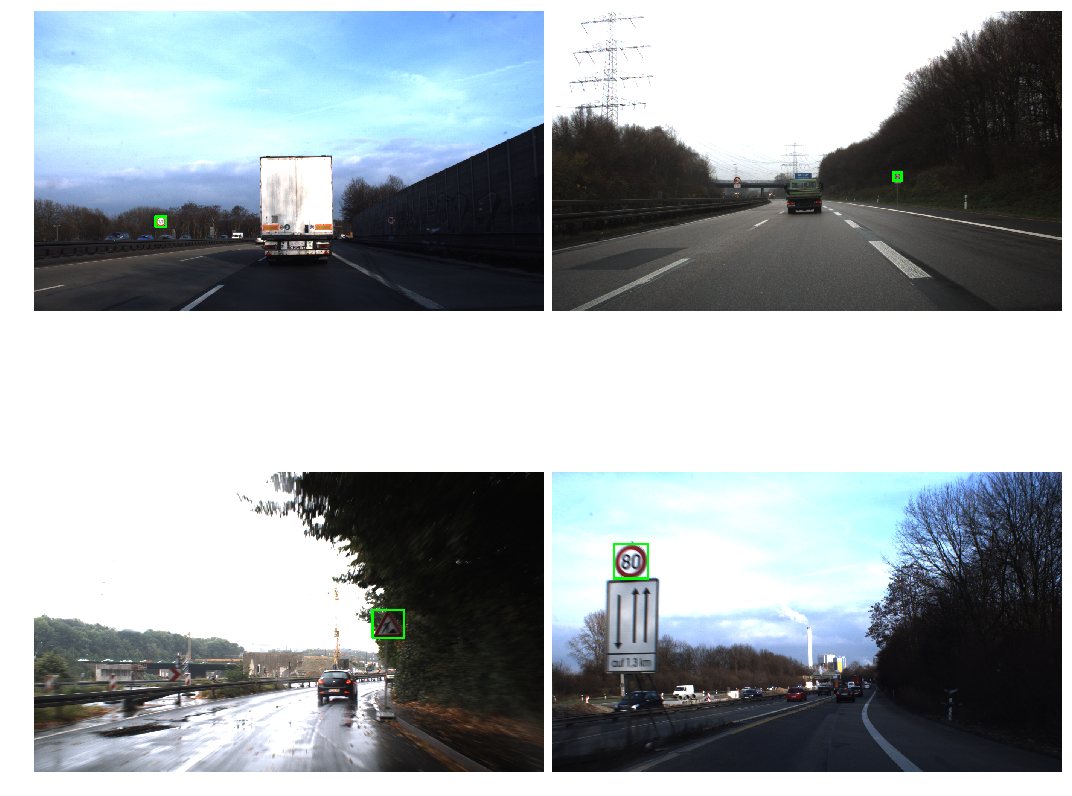

In [46]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(15,15), sharex=True, sharey=True, frameon=False)
for i, ax in enumerate(axes.flat):
    image_path = './FullIJCNN2013' + '/' +  df_train['image'][i]
    pt1 = (df_train['x1'][i],df_train['y1'][i])
    pt2  = (df_train['x2'][i],df_train['y2'][i])
    image = load_tracklet(image_path, pt1,pt2)
    
    ax.imshow(image)
    ax.axis('off')
plt.tight_layout(h_pad=0, w_pad=0)
    
    

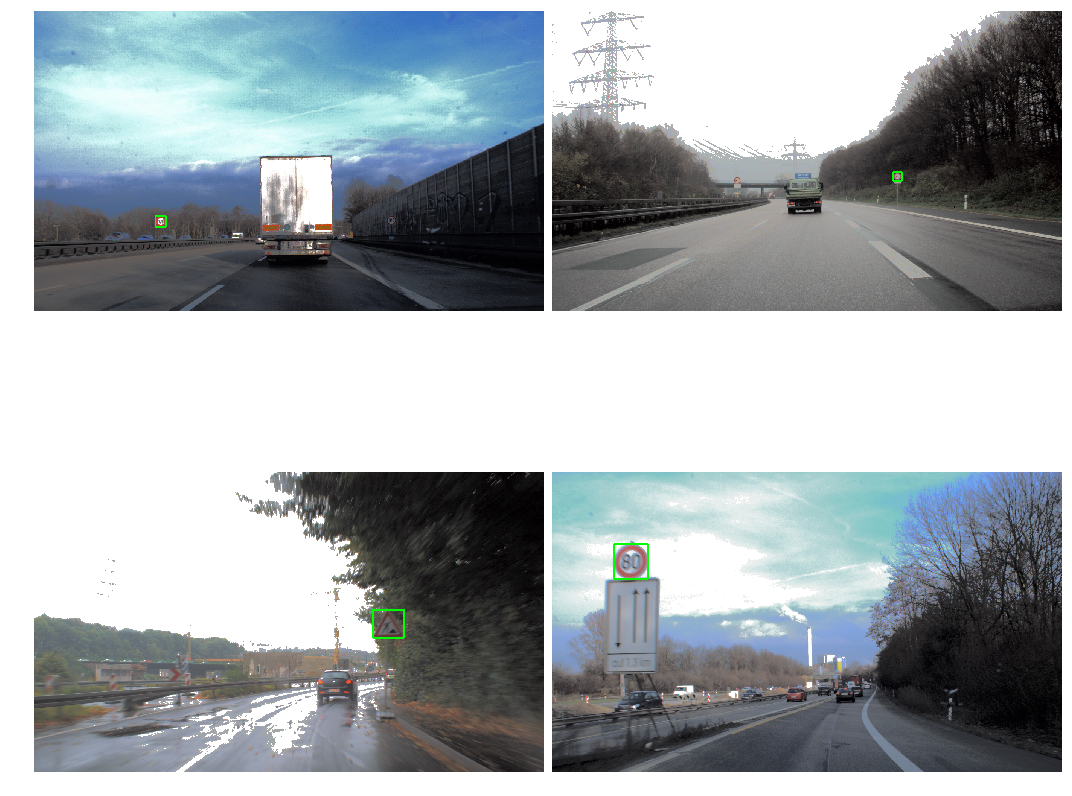

In [45]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(15,15), sharex=True, sharey=True, frameon=False)
for i, ax in enumerate(axes.flat):
    image_path = './FullIJCNN2013' + '/' +  df_train['image'][i]
    pt1 = (df_train['x1'][i],df_train['y1'][i])
    pt2  = (df_train['x2'][i],df_train['y2'][i])
    image = load_tracklet_hist(image_path, pt1,pt2)
    
    ax.imshow(image)
    ax.axis('off')
plt.tight_layout(h_pad=0, w_pad=0)

### Plotting Input Images

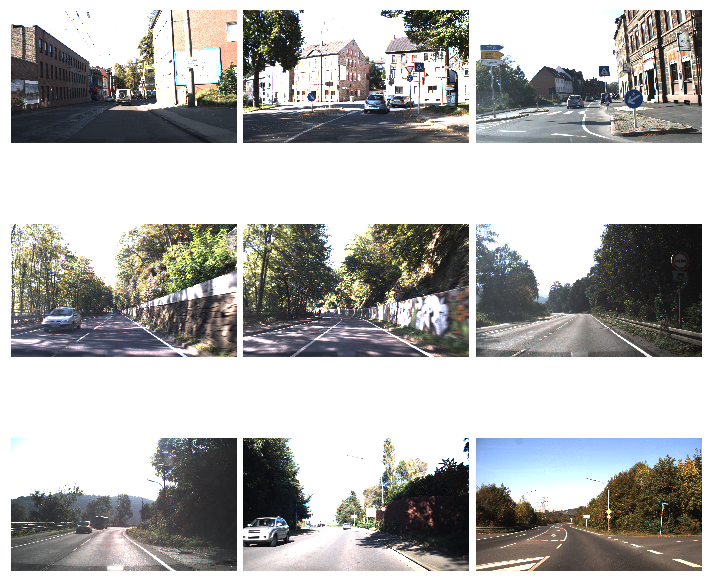

In [17]:
import matplotlib.image as mpimg
import glob

file_list = glob.glob("./FullIJCNN2013/*.ppm")
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(10,10), sharex=True, sharey=True, frameon=False)
for i,ax in enumerate(axes.flat):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #Pick a random picture from the file list
    imgplot = mpimg.imread(file_list[i], 0)
    ax.imshow(imgplot)
    #ax.text(10,20,file_list[indicies[i]].split("/")[-2], fontdict={"backgroundcolor": "black","color": "white" })
    ax.axis('off')
plt.tight_layout(h_pad=0, w_pad=0)
  
    

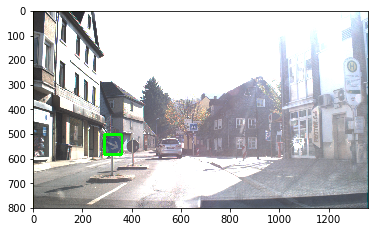

In [50]:
from PIL import Image
i = 10
image_path = './FullIJCNN2013' + '/' +  df_train['image'][i]
#im = Image.open(image_path)
pt1 = (df_train['x1'][i],df_train['y1'][i])
pt2  = (df_train['x2'][i],df_train['y2'][i])
image = load_tracklet(image_path, pt1,pt2)
plt.imshow(image)